## Assignment 7: Assessment and Measurements

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct. These questions are worth 2 points.

In [1]:
# Import libraries needed for this lab
from hashlib import sha1

import altair as alt
import graphviz
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.metrics import make_scorer
from sklearn.svm import SVC, SVR

import test_assignment7 as t
#alt.renderers.enable('mimetype')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

# 1. Precision, recall, and f1 score "by hand" (without `sklearn`)


Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

##### Model A
|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


##### Model B
|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

**Question 1.1** <br> {points: 1}  

Precision, recall, and f1 score depend crucially upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class?

Save the label name in a string object named `answer_1_1`.

In [5]:
answer_1_1 = "disease"

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer
answer_1_1

'disease'

In [7]:
t.test_1_1(answer_1_1)

AssertionError: Your answer is incorrect. Please try again.

**Question 1.2** <br> {points: 3}  

Calculate accuracies for Model A and Model B. 

Save the values of each calculations as a fraction in objects name `model_a_acc` and `model_b_acc` respectively. 

In [9]:
model_a_acc = 102/110
model_b_acc = 96/110

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer


In [11]:
t.test_1_2_1(model_a_acc)

'Success'

In [13]:
# check that the variable exists
assert 'model_b_acc' in globals(
), "Please make sure that your solution is named 'model_b_acc'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 1.3** <br> {points: 1}  

Which model would you pick simply based on the accuracy metric? 

Save either "Model A" or "Model B" in an object named `answer_1_3`.

In [15]:
answer_1_3 = "Model A"

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer


In [17]:
t.test_1_3(answer_1_3)

'Success'

**Question 1.4** <br> {points: 3}  

Calculate precision, recall, f1-score for **Model A** by designating the appropriate fraction to objects named `a_precision`, `a_recall` and `a_f1`. 

You can use the objects `a_precision` and `a_recall` to use in your `a_f1` calculation.

In [21]:
a_precision = 2/2
a_recall = 2/10
a_f1 = 2*a_precision*a_recall/(a_precision+a_recall)

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer


In [23]:
t.test_1_4_1(a_precision)

'Success'

In [25]:
t.test_1_4_2(a_recall)

'Success'

In [27]:
t.test_1_4_3(a_f1)

'Success'

**Question 1.5** <br> {points: 3}  

Calculate precision, recall, f1-score for **Model B** by designating the appropriate fraction to objects named `b_precision`, `b_recall` and `b_f1`. 

You can use the objects `b_precision` and `b_recall` to use in your `b_f1` calculation.

In [29]:
b_precision = 6/16
b_recall = 6/10
b_f1 = 2*b_precision*b_recall/(b_precision+b_recall)

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [31]:
t.test_1_5_1(b_precision)

'Success'

In [33]:
t.test_1_5_2(b_recall)

'Success'

In [35]:
t.test_1_5_3(b_f1)

'Success'

**Question 1.6** <br> {points: 1}  

Which metric is more informative in this case?

i) Accuracy

ii) Precision

iii) Recall

iv) f1



Select all that apply and add them into a list named `answer_1_6`. 
For example if statement i and iv are both true, your solution will look like this: 

```
answer_1_6 = ["i", "iv"] 
```


In [37]:
answer_1_6 = ["iii", "iv"]

# your code here
#raise NotImplementedError # No Answer - remove if you provide an answer

In [39]:
t.test_1_6(answer_1_6)

'Success'

**Question 1.7** <br> {points: 1}  

Which model would you pick based on this information? 

Save either "Model A" or "Model B" in an object named `answer_1_7`.

In [41]:
answer_1_7 = "Model B"

# your code here
#raise NotImplementedError # No Answer - remove if you provide an answer

In [43]:
t.test_1_7(answer_1_7)

'Success'

# 2. Classification evaluation metrics using `sklearn`

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In the lecture, we looked at a credit card fraud dataset which is a classic example of an imbalanced dataset. Another example is customer churn datasets. For the next questions, you will be using a [bank customer churn dataset](https://www.kaggle.com/shubh0799/churn-modelling) from Kaggle. In this question, we will be concentrating on the target label `Exited`. 

In [45]:
churn_df = pd.read_csv("data/churn.csv")
train_df, test_df = train_test_split(churn_df, test_size=0.3, random_state=123)
train_df.head()


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3144,15638003,648,Spain,Male,55,1,81370.07,1,0,1,181534.04,0
9939,15808971,693,Spain,Female,57,9,0.00,2,1,1,135502.77,0
7925,15800482,586,Spain,Female,33,7,0.00,2,1,1,168261.40,0
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01,0
9415,15750407,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


**Question 2.1** <br> {points: 1}  

What is the distribution of target values (`Exited`) in the train split? Your answer should be of type Pandas Series and saved in an object named `class_dist`.

In [47]:
class_dist = train_df["Exited"].value_counts()

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer


In [49]:
t.test_2_1(class_dist)

'Success'

**Question 2.2** <br> {points: 1}  

Let's now separate our feature vectors from the target.

Use all the columns except for `Exited` as your `X` and the `Exited` column as your target `y`. 

You will need to split both `train_df` and `test_df`. 

Save the results in objects named `X_train`, `y_train`, `X_test` and `y_test`. 

In [51]:
# Separate features (X) and target variable (y) from train_df and test_df
X_train = train_df.drop(columns=["Exited"])  # Drop the target column for training features
y_train = train_df["Exited"]  # Keep only the target column for training labels

X_test = test_df.drop(columns=["Exited"])  # Drop the target column for test features
y_test = test_df["Exited"]  # Keep only the target column for test labels

# Verify by displaying first few rows of X_train
X_train.head()


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3144,15638003,648,Spain,Male,55,1,81370.07,1,0,1,181534.04
9939,15808971,693,Spain,Female,57,9,0.00,2,1,1,135502.77
7925,15800482,586,Spain,Female,33,7,0.00,2,1,1,168261.40
309,15746726,438,Germany,Male,31,8,78398.69,1,1,0,44937.01
9415,15750407,768,Germany,Female,43,2,129264.05,2,0,0,19150.14


In [53]:
t.test_2_2(X_train,X_test,y_train,y_test)

'Success'

**Question 2.3** <br> {points: 1} 

Carry out cross-validation with `DummyClassifier` using the `stratified` strategy. Pass the following `scoring` metrics to `cross_validate`. 
- accuracy
- f1
- recall
- precision

Make sure you use  `return_train_score=True` and 5-fold cross-validation.

Save your results in a dataframe named `dummy_scores`. 

In [59]:
# Create DummyClassifier with 'stratified' strategy
dummy_clf = DummyClassifier(strategy="stratified")

# Perform 5-fold cross-validation with scoring metrics
cv_results = cross_validate(dummy_clf, X_train, y_train, 
                            scoring=['accuracy', 'f1', 'recall', 'precision'], 
                            return_train_score=True, 
                            cv=5)

# Convert results into a DataFrame
dummy_scores = pd.DataFrame(cv_results)

# Display the results
dummy_scores


,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.001003,0.006102,0.685000,0.676429,0.213904,0.199647,0.209790,0.197208,0.218182,0.202147
1,0.002001,0.004508,0.645714,0.673750,0.176080,0.202532,0.185315,0.202443,0.167722,0.202620
2,0.001001,0.004999,0.666429,0.671607,0.184991,0.206986,0.185315,0.209424,0.184669,0.204604
3,0.001000,0.006001,0.682143,0.669107,0.231434,0.196095,0.233449,0.197380,0.229452,0.194828
4,0.001000,0.006000,0.659286,0.674107,0.152753,0.222412,0.149826,0.227948,0.155797,0.217138


In [61]:
t.test_2_3(dummy_scores)

'Success'

**Question 2.4** <br> {points: 1} 

What is the mean of each column in `dummy_scores`?


Save your result in an object named `dummy_mean`. 

In [63]:
dummy_mean = dummy_scores.mean() 

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [65]:
t.test_2_4(dummy_mean)

'Success'

**Question 2.5** <br> {points: 5}  

Using either `.describe(include="all")`, `.info()` or looking at the data, split it into 4 types of features; numeric, categorical, binary and `drop_features`. 

- Add the labels of the numeric column(s) (as type string) to a list name `numeric_features`.
- Add the labels of the categorical column(s) (as type string) to a list name `categorical_features`.
- Add the labels of the binary column(s) (as type string) to a list name `binary_features`.
- Add the labels of the column that should be excluded from the model fitting to a list named `drop_features`. _(Hint: which of the columns is a unique identifier for the examples?)_

Identify different feature types (e.g., numeric, categorical, binary, drop features).
train_df.info()

In [67]:
X_train.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [79]:
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "HasCrCard", "IsActiveMember"]
categorical_features = ["Geography"]
binary_features = ["Gender"] 
drop_features = ["CustomerId"]  

In [81]:
t.test_2_5_1(numeric_features)

'Success'

In [83]:
# check that the variable exists
assert 'categorical_features' in globals(
), "Please make sure that your solution is named 'categorical_features'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

In [85]:
t.test_2_5_3(drop_features)

'Success'

In [87]:
t.test_2_5_4(binary_features)

'Success'

Since we have no null values we can skip the individual pipelines and make our column transforming with just a single transformation. 

Because everyone needs a little help once in a while, I am going to do this part for you! 

In [89]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (OneHotEncoder(handle_unknown="error", drop="if_binary"), binary_features)
)

**Question 2.6** <br> {points: 2}  

In this question, you will be using the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) which you haven't studied yet but did see in assignment 3.  You should feel comfortable using models with our usual ML workflow even if you haven't seen them before. 


Build a pipeline named `unbalanced_pipe` that first preprocesses `preprocessor` and then builds a  `RandomForestClassifier` using a random_state of 77. 

Carry out cross-validation on `unbalanced_pipe` and the training set using the `cross_validate` function and the following evaluation metrics:
- `accuracy`
- `precision`
- `recall`
- `f1`

Note that you can pass multiple [scoring metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) as a list or a dict to the `scoring` parameter. 

Save the results of the cross-validation in a dataframe named`rf_unbalanced_scores`.

In [91]:
# Create the pipeline with the preprocessor and RandomForestClassifier
unbalanced_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=77))

# Perform cross-validation
rf_unbalanced_scores = pd.DataFrame(
    cross_validate(
        unbalanced_pipe, X_train, y_train,
        scoring=["accuracy", "precision", "recall", "f1"],  # Include all required metrics
        cv=5,  # 5-fold cross-validation
        return_train_score=True
    )
)

# Display the results
rf_unbalanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.692492,0.041116,0.855000,1.0,0.724324,1.0,0.468531,1.0,0.569002,1.0
1,0.666167,0.030008,0.842143,1.0,0.740741,1.0,0.349650,1.0,0.475059,1.0
2,0.683662,0.029020,0.872143,1.0,0.824242,1.0,0.475524,1.0,0.603104,1.0
3,0.709346,0.031507,0.852857,1.0,0.721311,1.0,0.459930,1.0,0.561702,1.0
4,0.670702,0.030532,0.867143,1.0,0.802395,1.0,0.466899,1.0,0.590308,1.0


In [92]:
t.test_2_6(rf_unbalanced_scores)

'Success'

**Question 2.7** <br> {points: 1} 

What is the mean of each column in `rf_unbalanced_scores`?


Save your result in an object named `rf_unbalanced_mean`. 

In [95]:
rf_unbalanced_mean = rf_unbalanced_scores.mean() 

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [97]:
t.test_2_7(rf_unbalanced_mean)

'Success'

**Question 2.8** <br> {points: 2}  

Repeat question 6 above but this time set `class_weight="balanced"` in the `RandomForestClassifier`. 
Save the new pipeline in an object named `balanced_pipe`. Don't forget to use `random_state=77`for the classifier. 

Carry out cross-validation on `balanced_pipe` but this time save the scores in a dataframe named `rf_balanced_scores`.

In [99]:
# Create the pipeline with the preprocessor and RandomForestClassifier with class_weight="balanced"
balanced_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=77, class_weight="balanced"))

# Perform cross-validation
rf_balanced_scores = pd.DataFrame(
    cross_validate(
        balanced_pipe, X_train, y_train,
        scoring=["accuracy", "precision", "recall", "f1"],  # Include all required metrics
        cv=5,  # 5-fold cross-validation
        return_train_score=True
    )
)

# Display the results
rf_balanced_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.664932,0.032006,0.861429,1.0,0.777108,1.0,0.451049,1.0,0.570796,1.0
1,0.698583,0.031000,0.840714,1.0,0.736842,1.0,0.342657,1.0,0.467780,1.0
2,0.686012,0.029837,0.871429,1.0,0.844156,1.0,0.454545,1.0,0.590909,1.0
3,0.665385,0.029354,0.855714,1.0,0.745665,1.0,0.449477,1.0,0.560870,1.0
4,0.658902,0.029325,0.867857,1.0,0.800000,1.0,0.473868,1.0,0.595186,1.0


In [100]:
t.test_2_8(rf_balanced_scores)

'Success'

**Question 2.9** <br> {points: 1} 

What is the mean of each column in `rf_balanced_scores`?


Save your result in an object named `rf_balanced_mean`. 

In [103]:
rf_balanced_mean = rf_balanced_scores.mean() 

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [105]:
t.test_2_9(rf_balanced_mean)

'Success'

**Question 2.10** <br> {points: 1} 

Look at your results above. Which of the following statements are true? 

i) Both random forest models have better mean validation accuracy performance than the dummy classifier.

ii) The balanced class random forest model has a better mean validation recall score than the unbalanced random forest model. 

iii) The balanced class random forest model has a better mean validation precision score than the unbalanced random forest model.  

iv) Mean validation precision and recall scores only increased in the balanced class random forest model.

v) Both random forest models show higher validation precision scores than validation recall scores. 


Select all that apply and add them into a list named `answer_2_10`. 
For example if statement i and iv are both true, your solution will look like this: 

```
answer_2_10 = ["i", "iv"] 
```


In [107]:
answer_2_10 =  ["i","iii","v"] 

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [109]:
t.test_2_10(answer_2_10)

'Success'

**Question 2.11** <br> {points: 1} 

For this next question, you are provided with the majority of the code to hyperparameter tune the balanced `RandomForestClassifier`. 

Copy and paste the contents of the cell below into the following cell where the solution should be. Fill in the `....` blanks below so that it executes and returns the output. 

In [111]:
import scipy
from scipy.stats import randint
# Create the pipeline with balanced RandomForestClassifier
rf_pipeline = make_pipeline(
    preprocessor, 
    RandomForestClassifier(class_weight="balanced", random_state=123)
)

# Define hyperparameter distribution
param_dist = {
    "randomforestclassifier__n_estimators": randint(low=10, high=300),
    "randomforestclassifier__max_depth": randint(low=2, high=20),
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions=param_dist, 
    n_iter=50,  # Number of iterations
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Show progress
    n_jobs=-1,  # Use all available processors
    scoring="f1",  # Optimize for F1-score
    random_state=123
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Display results
random_search

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['CustomerId']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'EstimatedSalary',
                                                                                'HasCrCard',
                                                                                'IsActiveMember']),
                                                                              ('onehotencoder-1',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Geography']),
                                                                              ('o...
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=123))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016D5AC49850>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016D5AC49040>},
                   random_state=123, scoring='f1', verbose=1)

In [112]:
t.test_2_11(rf_pipeline, random_search)

'Success'

**Question 2.12** <br> {points: 3}

What are the best hyperparameter value for `n_estimators` and `max_depth`. Save it in an object named `optimal_parameters` (We are expecting a dictionary object). 

What was the corresponding validation score? Save this in an object named `optimal_score`. 

*Hint: `.best_params_`  and `.best_score_` are helpful here.* 


In [121]:
# Extract best hyperparameters from RandomizedSearchCV
optimal_parameters = random_search.best_params_

# Extract best validation score
optimal_score = random_search.best_score_

# Display results
print("Optimal Hyperparameters:", optimal_parameters)
print("Optimal Validation Score:", optimal_score)


Optimal Hyperparameters: {'randomforestclassifier__max_depth': 8, 'randomforestclassifier__n_estimators': 98}
Optimal Validation Score: 0.6030939207857119


In [123]:
t. test_2_12_1(random_search, optimal_parameters)

'Success'

In [125]:
# check that the variable exists
assert 'optimal_score' in globals(
), "Please make sure that your solution is named 'optimal_score'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question 2.13** <br> {points: 2} 

What is the train and test score of the best scoring model? Save the result in objects named `training_score`, and `testing_score` respectively.

In [127]:
training_score = random_search.score(X_train, y_train)
testing_score = random_search.score(X_test, y_test)
(training_score,testing_score)
# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

(0.6967821782178217, 0.6430123099203475)

In [129]:
t.test_2_13_1(random_search, training_score, X_train, y_train)

'Success'

In [131]:
t.test_2_13_2(random_search, testing_score, X_test, y_test)

'Success'

**Question 2.14** <br> {points: 0} 

Import the appropriate libraries to plot a confusion matrix and print a classification report. 

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [135]:
t.test_2_14()

'Success'

**Question 2.15** <br> {points: 1} 


Plot a confusion matrix on the test set using the object `random_search` as your estimator and "normalize" all your results

Name the plot `cm_plot`. 

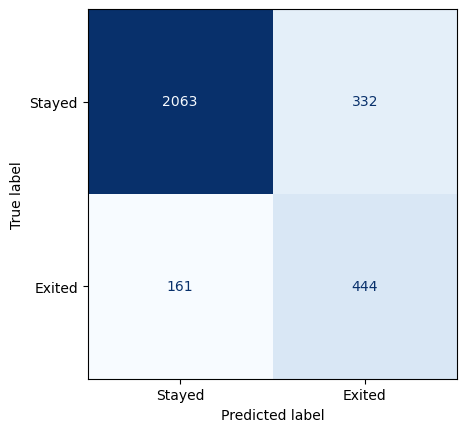

In [137]:
import matplotlib.pyplot as plt
cm_plot = ConfusionMatrixDisplay.from_estimator(
 random_search, # Use the tuned model directly
 X_test,
 y_test,
 display_labels=["Stayed", "Exited"],
 values_format="d",
 cmap=plt.cm.Blues,
 colorbar=False
)
# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer


In [138]:
t.test_2_15(cm_plot)

'Success'

**Question 2.16** <br> {points: 3} 

Below print a classification report on the `X_test` predictions of `random_search`'s best model. Use this information to answer the questions below.

In [141]:
random_search.classes_
print(classification_report(y_test, random_search.predict(X_test),
 target_names=["Stayed", "Exited"]))
#Use this cell to print your classification report

              precision    recall  f1-score   support

      Stayed       0.93      0.86      0.89      2395
      Exited       0.57      0.73      0.64       605

    accuracy                           0.84      3000
   macro avg       0.75      0.80      0.77      3000
weighted avg       0.86      0.84      0.84      3000





A) What is the recall considering that `Exited`(=1) is our "positive" class? Save the result to two decimal places in an object named `answer2_16a`. 

B) What is the precision weighted average? Save the result to two decimal places in an object named `answer2_16b`. 

C) How many customers exited in this test set? Save the result as an integer in an object named `answer2_16c`.

In [143]:
from sklearn.metrics import recall_score, precision_score

# A) Calculate recall for the positive class (Exited = 1), rounded to 2 decimal places
answer2_16a = round(recall_score(y_test, random_search.predict(X_test), pos_label=1), 2)

# B) Calculate precision weighted average, rounded to 2 decimal places
answer2_16b = round(precision_score(y_test, random_search.predict(X_test), average="weighted"), 2)

# C) Calculate how many customers exited in the test set
answer2_16c = int((y_test == 1).sum())  # Ensure it's an integer

# Display results
(answer2_16a, answer2_16b, answer2_16c)

(0.73, 0.86, 605)

In [145]:
t.test_2_16_1(answer2_16a)

'Success'

In [147]:
t.test_2_16_2(answer2_16b)

'Success'

In [149]:
t.test_2_16_3(answer2_16c)

'Success'

**Question 2.17** <br> {points: 1} 

What's happened to our model since we have tuned our hyperparameters?

A) We have sacrificed some of our precision score for a better recall score.

B) Our accuracy has decreased.

C) We have likely increased the number of falsely identified exited customers.

D) All of the above.

*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between `""`, assign the correct answer to an object called `answer2_17`.*

In [151]:
answer2_17 = "D"

# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer
answer2_17

'D'

In [153]:
t.test_2_17(answer2_17)

'Success'

# 3. Regression Metrics

For this exercise, we will bring back the [Taiwan real estate valuation dataset](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) that we saw in assignment 1. 

We are doing the first part for you. 

In [155]:
housing_df = pd.read_csv('data/real_estate.csv')
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)
train_df.head()

,house_age,distance_station,num_stores,latitude,longitude,price
82,13.2,150.9347,7,24.96725,121.54252,48.1
307,10.3,3079.8900,0,24.95460,121.56627,24.7
267,34.7,482.7581,5,24.97433,121.53863,41.1
310,16.4,1643.4990,2,24.95394,121.55174,24.7
203,15.6,289.3248,5,24.98203,121.54348,46.1


In [157]:
X_train = train_df.drop(columns=['price'])
y_train = train_df['price']

X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

**Question 3.1** <br> {points: 1}  

Since we have seen this dataset already, we know there are only numeric features and no missing values so we can skip quite a few steps here. 

Make a single pipeline using `make_pipeline` named `reg_pipe` that first uses `StandardScaler()`.


In [159]:
# Create the pipeline
from sklearn.linear_model import LinearRegression
# Create the pipeline with SVR as the regressor
reg_pipe = make_pipeline(
 StandardScaler(), # Standardize the features
 SVR() # Support Vector Regression model
)
# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [161]:
t.test_3_1(reg_pipe)

'Success'

**Question 3.2** <br> {points: 1}  

Given the MAPE function we have given below, create a scorer function that we can pass into cross-validation. (look [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html?highlight=make_scorer#sklearn.metrics.make_scorer) for help). 

Save it in an object named `mape_scorer`. Remember that MAPE is an error measure so we must use `greater_is_better=False` as an argument. 


In [163]:
def mape(true, pred):
 return 100.0 * np.mean(np.abs((pred - true) / true))
mape_scorer = make_scorer(mape, greater_is_better=False)
# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

In [165]:
t.test_3_2(mape_scorer)

'Success'

**Question 3.3** <br> {points: 1}  

Make a dictionary named `scoring_dict` consisting the following metrics: 

- `neg_mean_squared_error`
- `neg_root_mean_square_error`
- `neg_mean_absolute_error`
- `r2`
- `mape_scorer`

The key-value pairs in this dictionary should be identical. (Aka the item to the left of the colon is the same as the right side of the colon)

Remember that `mape_scorer` is a variable and should **NOT** be called as a string. (Although we need to name it as a string value for the dictionary's key)

In [167]:
scoring_dict = {
 "neg_mean_squared_error": "neg_mean_squared_error",
 "neg_root_mean_square": "neg_root_mean_squared_error",
 "neg_mean_absolute_error": "neg_mean_absolute_error",
 "r2": "r2",
 "mape_scorer": mape_scorer
}
# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer


In [169]:
t.test_3_3(scoring_dict)

'Success'

**Question 3.4** <br> {points: 1}  

Carry out cross-validation on `reg_pipe` and the training set using the `cross_validate` function.

Make sure to set `return_train_score=True` and assign our `scoring_dict` to the `scoring` argument.


Save the results of the cross-validation in a dataframe named `regression_scores`.

In [171]:
# Perform cross-validation using reg_pipe
regression_scores = pd.DataFrame(
    cross_validate(
        reg_pipe, X_train, y_train,
        scoring=scoring_dict,  # Use predefined scoring dictionary
        return_train_score=True,  # Include training scores
        cv=5  # Use 5-fold cross-validation
    )
)

# Display the results
regression_scores


,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_square,train_neg_root_mean_square,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
0,0.020503,0.004999,-51.770992,-89.378376,-7.195206,-9.454014,-5.143214,-5.893161,0.642393,0.544464,-12.531763,-17.800519
1,0.005000,0.003000,-67.990528,-84.527725,-8.245637,-9.193896,-5.969532,-5.723566,0.660132,0.536472,-20.185804,-16.637512
2,0.004999,0.003000,-37.858863,-90.483537,-6.152956,-9.512283,-4.899578,-5.868916,0.692046,0.551250,-13.713411,-17.498790
3,0.004000,0.003999,-63.846806,-81.002011,-7.990420,-9.000112,-5.532826,-5.658821,0.612303,0.574322,-17.381394,-17.090115
4,0.005000,0.003000,-197.275789,-53.292369,-14.045490,-7.300162,-8.115725,-5.157088,0.325115,0.664975,-24.880064,-14.847449


In [173]:
t.test_3_4(regression_scores)

KeyError: 'test_neg_root_mean_square_error'

**Question 3.5** <br> {points: 1} 

What is the mean of each column in `regression_scores`?


Save your result in an object named `regression_mean`. 

In [175]:
regression_mean = regression_scores.mean()
regression_mean
# your code here
#raise NotImplementedError # No Answer - remove if you provide an answer

fit_time                          0.007900
score_time                        0.003600
test_neg_mean_squared_error     -83.748596
train_neg_mean_squared_error    -79.736804
test_neg_root_mean_square        -8.725942
train_neg_root_mean_square       -8.892093
test_neg_mean_absolute_error     -5.932175
train_neg_mean_absolute_error    -5.660310
test_r2                           0.586398
train_r2                          0.574297
test_mape_scorer                -17.738487
train_mape_scorer               -16.774877
dtype: float64

In [177]:
t.test_3_5(regression_mean)

'Success'

**Question 3.6** <br> {points: 2} 

What is the model's mean validation MAPE score? 

Save your answer to 2 decimal places in an object named `mean_reg_mape`. 

In [181]:
mean_reg_mape = round(regression_scores["test_mape_scorer"].mean(), 2)
mean_reg_mape
# your code here
# raise NotImplementedError # No Answer - remove if you provide an answer

-17.74

In [183]:
# check that the variable exists
assert 'mean_reg_mape' in globals(
), "Please make sure that your solution is named 'mean_reg_mape'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

## Attributions
- The Bank Customer Churn DataSet - [Kaggle](https://www.kaggle.com/shubh0799/churn-modelling)

- Real Estate Dataset - [The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

*Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*


Before submitting your assignment please do the following:

- Read through your solutions
- Goto the File --> Save the notebook as --> PDF (or you can use HTML as well)
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"  